# A1: Logic and lambda calculus

The lab is an exploration and learning exercise to be done in a group and also in discussion with the teachers and other students.

Before starting, please read the following instructions on [how to work on group assignments](https://github.com/sdobnik/computational-semantics/blob/master/README.md).

Write all your answers and the code in the appropriate boxes below.

**Statement of contribution**

Each of us did the assignment individually first and then we met on Discord on Tuesday 6th of April to discuss and combine our solutions. Most of them were the same, although there are some sentences in which we did not reach an agreement. These debatable answers have comments.

## Translating English to logic and evaluating logic in a model

In [1]:
# This task needs NLTK and Jupyter Notebook (IPython package).
import nltk
from utils import display_latex, display_translation, display_tree, display, Markdown
read_expr = nltk.sem.Expression.fromstring

### 1. Propositional logic
Translate the following sentences into **propositional logic** and verify that they parse with Expression.fromstring(). Provide a key which shows how the propositional variables in your translation correspond to expressions of English. Briefly discuss any difficulties you encounter. (By difficulties we mean cases where the semantics of English expressions cannot be expressed to the same degree by the semantics of your logic representations, i.e. they do not mean the same). **[5 + 1 marks]**

In [2]:
"""
Alex plays the piano: P
Alex is smart: Q
Alex is musical: R
Lydia is happy: S
George plays the piano: T
George is musical: U
Lydia is smart: V
Lydia is musical W
"""

propositions = {
    "If Alex plays the piano, she is smart.":
    read_expr('P -> Q'),
    
    "Alex is both smart and musical.":
    read_expr('Q & R'),
    
    "If Alex is not smart, Lydia is not happy.":
    read_expr('-Q -> -S'),
    
    "If Alex or George plays the piano, they are musical.":
    read_expr('(P -> R) & (T -> U)'),
    
    "George plays the piano.":
    read_expr('T'),
}

for text, semrep in propositions.items():
    display_translation(text, semrep)

"If Alex plays the piano, she is smart.": $(P\ \rightarrow\ Q)$

"Alex is both smart and musical.": $(Q\ \land\ R)$

"If Alex is not smart, Lydia is not happy.": $(-Q\ \rightarrow\ -S)$

"If Alex or George plays the piano, they are musical.": $((P\ \rightarrow\ R)\ \land\ (T\ \rightarrow\ U))$

"George plays the piano.": $T$

*Difficulties encountered:* Due to the ambiguity of the pronoun they in "If Alex or George plays the piano, they are musical.", this sentence can be interpreted in various ways:
- "If Alex plays the piano, she is musical, and if George plays the piano, he is musical" --> '(P -> R) & (T -> U)' 
- "If Alex plays the piano or if George plays the piano, either one of them is musical" --> '(P | R) -> (T | U)'
- "If Alex plays the piano or if George plays the piano, they're both musical" --> '(P | R) -> (T & U)'

*General notes:* The material conditional is not the same as what we would expect in English: it will evaluate to false only if the left element is true and the right element is false. We do not want F -> T to be overall true as well.

### 2. Valuation of Propositional logic

Imagine that we observe a world where 
- (i) Alex does not play the piano,
- (ii) Alex and Lydia are smart and musical,
- (iii) George is not musical,
- (iv) Lydia is happy,
- (v) George plays the piano. 

Translate this informal description of the world into a model by appropriately defining an evaluation function and evaluate the formulae from Question 1 in this model. Briefly comment the answers you get. **[5 + 1 marks]**.

In [3]:
val = nltk.Valuation([('P', False), ('Q', True), ('R', True), ('V', True), ('W', True), ('U', False), ('S', True), ('T', True)])

dom = set([])
g = nltk.Assignment(dom)
m = nltk.Model(dom, val)

for text, semrep in propositions.items():
    print(str(semrep), 'is', m.evaluate(str(semrep), g))

(P -> Q) is True
(Q & R) is True
(-Q -> -S) is True
((P -> R) & (T -> U)) is False
T is True


*Comments:*
- The first one is True because P is False and Q is True, which in the material implication and it's not what we expect in the sentence in natural language.
- The second one is True because Q and R are True.
- Not Q is False, and not S is also False, therefore it is False -> False. In the implication, again, this is True.
- Assumption: if Alex plays the piano she has to be musical and if George plays the piano, he has to be musical (they don't have to be at the same time). And in the model, it is clearly wrong because George plays the piano but he is not musical.

### 3. Predicate logic *without quantifiers*

Translate the following sentences into predicate-argument formulae of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[4 + 1 marks]**

In [4]:
sentences1 = {
    "Lydia likes George but Lydia doesn't like Alex": 
    read_expr(r'like(Lydia, George) & -like(Lydia, Alex)'),
    
    "Lydia likes herself and so does George":
    read_expr(r'like(Lydia, Lydia) & like(George, George)'),
    
    "Charlie is an English pianist who plays a sonata":
    read_expr(r'english(Charlie) & pianist(Charlie) & play(Charlie, sonata)'),
    
    "Lydia and George admire each other":
    read_expr(r'admire(Lydia, George) & admire(George, Lydia)'),
}

for text, semrep in sentences1.items():
    display_translation(text, semrep)

"Lydia likes George but Lydia doesn't like Alex": $(like(Lydia,George)\ \land\ -like(Lydia,Alex))$

"Lydia likes herself and so does George": $(like(Lydia,Lydia)\ \land\ like(George,George))$

"Charlie is an English pianist who plays a sonata": $(english(Charlie)\ \land\ pianist(Charlie)\ \land\ play(Charlie,sonata))$

"Lydia and George admire each other": $(admire(Lydia,George)\ \land\ admire(George,Lydia))$

*Difficulties encountered:* In "Lydia likes herself and so does George", it's difficult to say whether George likes Lydia or likes himself as Lydia likes herself as well. We have two interpretations:
- Lydia likes herself and George likes himself --> 'like(Lydia, Lydia) & like(George, George)'
- Lydia likes herself and George likes Lydia --> 'like(Lydia, Lydia) & like(George, Lydia)'

### 4. First order logic with quantifiers

Translate the following sentences into quantified formulas of First Order Logic and verify that they parse with `Expression.fromstring()`. Briefly discuss any difficulties you encounter. **[4 + 1 marks]**

In [5]:
sentences2 = {
    "Charlie knows a woman who likes George":
    read_expr('exists x. (woman(x) & know(Charlie, x) & like(x, George))'),
    
    "George admires everybody and Lydia admires nobody":
    read_expr('all x. exists y. (admire(George,x) & -admire(Lydia,y))'),

    "Nobody admires everybody":
    read_expr('-exists x. (all y(admire(x, y)))'),
    
    "Exactly one musician plays everything Alex wrote":
    read_expr('exists x. all y. (write(Alex, y) & musician(x) -> play(x, y)) & (all z. all y. (write(Alex, y) & musician(z) -> play(z, y)) -> x=z)')
#     read_expr('exists x. all y. all z. ((write(Alex, y) -> (play(x, y) & play(z,y) & musician(x))) -> x=z)'),
}

for text, semrep in sentences2.items():
    display_translation(text, semrep)

"Charlie knows a woman who likes George": $\exists\ x.(woman(x)\ \land\ know(Charlie,x)\ \land\ like(x,George))$

"George admires everybody and Lydia admires nobody": $\forall\ x.\exists\ y.(admire(George,x)\ \land\ -admire(Lydia,y))$

"Nobody admires everybody": $-\exists\ x.\forall\ y.admire(x,y)$

"Exactly one musician plays everything Alex wrote": $(\exists\ x.\forall\ y.((write(Alex,y)\ \land\ musician(x))\ \rightarrow\ play(x,y))\ \land\ (\forall\ z\ y.((write(Alex,y)\ \land\ musician(z))\ \rightarrow\ play(z,y))\ \rightarrow\ (x\ =\ z)))$

*Difficulties encountered:*
- For the third sentence, we think that 'all x.exists y.-admire(x, y)' could also mean the same thing.
- For the last sentence, it is very complicated to write a logical representation for "exactly one musician".
- We discussed whether we should use & or -> for the last sentence in write(Alex, y) &/-> (play(x, y)... It was vague if that one musician plays exclusively everything Alex wrote or if that musician plays pieces from other people as well. We agreed on the second interpretation, but it's still up for discussion.

### 5. Valuation of first order logic

We observe a world with entities Lydia, George, Alex, Charlie and Bertie, sonata, etude, prelude, waltz, scherzo.

1. Lydia likes Lydia, George, Alex and Charlie. George likes Lydia, Bertie and George. Alex likes Alex. Charlie likes Lydia, George, Alex, Charlie and Bertie. Bertie likes Alex.
2. Lydia, George, Alex, Charlie and Bertie are English.
3. Charlie and Bertie are pianists.
4. Charlie plays a sonata, an etude and a waltz. Bertie plays a waltz and a scherzo. Lydia plays an etude, a prelude and a waltz.
5. Lydia admires Lydia, Charlie and Bertie. George admires Lydia, George, Alex, Charlie and Bertie. Alex admires Lydia, Alex and Bertie. Charlie admires George and Bertie. Bertie admires Lydia, George, Alex, Charlie and Bertie.
6. Lydia knows Lydia, George, Alex, Charlie and Bertie. George knows Lydia, George and Bertie. Alex knows Lydia, Alex and Bertie. Charlie knows George, Charlie and Bertie. Bertie knows Lydia, George, Alex, Charlie and Bertie.
7. Lydia, Alex and Charlie are women.
8. George and Bertie are men.
9. Alex wrote a sonata, an etude an a waltz.
10. Lydia, Alex, Charlie and Bertie are musicians.

Translate this informal description of the world into a model and evaluate the formulae from Questions 3 and 4 in this model. Briefly comment on the answers you get **[3 + 2 marks]**.

In [6]:
entities = set(['p','t','e','h','r','s','u','l','w','c'])

assign = """
Lydia => p
George => t
Alex => e
Charlie  => h
Bertie => r
sonata => s
etude => u
prelude => l
waltz => w
scherzo => c
like => {(p,p), (p,t), (p,e), (p,h), (t,p), (t,r), (t,t), (e,e), (h,p), (h,t), (h,e), (h,h), (h,r), (r,e)}
english => {p, t, e, h, r}
pianist => {h, r}
play => {(h,s), (h,u), (h,w), (r,w), (r,c), (p,u), (p,l), (p,w)}
admire => {(p,p), (p,h), (p,r), (t,p), (t,t), (t,e), (t,h), (t,r), (e,p), (e,e), (e,r), (h,t), (h,r), (r,p), (r,t), (r,e), (r,h), (r,r)}
know => {(p,p), (p,t), (p,e), (p,h), (p,r), (t,p), (t,t), (t,r), (e,p), (e,e), (e,r), (h,t), (h,h), (h,r), (r,p), (r,t), (r,e), (r,h), (r,r)}
woman => {p, e, h}
man => {t, r}
write => {(e,s), (e,u), (e,w)}
musician => {p, e, h, r}
"""

val2 = nltk.Valuation.fromstring(assign)

g2 = nltk.Assignment(entities)
m2 = nltk.Model(entities, val2)

# sentences from question 3
for text, semrep in sentences1.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))

# sentences from question 4
for text, semrep in sentences2.items():
    print(m2.evaluate(str(semrep), g2))
    display_latex(semrep)
    display(Markdown('----'))


False


$(like(Lydia,George)\ \land\ -like(Lydia,Alex))$

----

True


$(like(Lydia,Lydia)\ \land\ like(George,George))$

----

True


$(english(Charlie)\ \land\ pianist(Charlie)\ \land\ play(Charlie,sonata))$

----

False


$(admire(Lydia,George)\ \land\ admire(George,Lydia))$

----

True


$\exists\ x.(woman(x)\ \land\ know(Charlie,x)\ \land\ like(x,George))$

----

False


$\forall\ x.\exists\ y.(admire(George,x)\ \land\ -admire(Lydia,y))$

----

True


$-\exists\ x.\forall\ y.admire(x,y)$

----

True


$(\exists\ x.\forall\ y.((write(Alex,y)\ \land\ musician(x))\ \rightarrow\ play(x,y))\ \land\ (\forall\ z\ y.((write(Alex,y)\ \land\ musician(z))\ \rightarrow\ play(z,y))\ \rightarrow\ (x\ =\ z)))$

----

*Comments on the answers:*

1. False because Lydia does like Alex.
2. True because because they both like themselves, and that's the interpretation we chose.
3. All the statements are true.
4. False because Lydia doesn't admire George.
5. True because Charlie knows herself and she likes George.
6. False because Lydia admires Lydia, Charlie and Bertie.
7. True, because no one admires everyone.
8. True, because Charlie is the only musician who plays sonata, waltz and etude, which is what Alex wrote.

## Lambda calculus

In [7]:
from nltk.grammar import FeatureGrammar

### 6. Function application and $\beta$-reduction
In the following examples some code has been deleted and replaced with `<????>`. What has been deleted? Verify that your answer is correct. **[4 marks]**

In [8]:
e1 = read_expr(r'\x.like(x, rob)')
e2 = read_expr(r'pip')
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with reuslt like(pip,rob).
display_latex(read_expr(r"like(pip,rob)"))

e1 = read_expr(r'\P.(P(pip))')
e2 = read_expr(r'\x.play(x,scherzo)') 
e3 = nltk.sem.ApplicationExpression(e1,e2)
display_latex(e3.simplify())
# with result play(pip,scherzo).
display_latex(read_expr(r"play(pip,scherzo)"))

e1 = read_expr(r'\P.exists x.(woman(x) & P(x))')
e2 = read_expr(r'\x.play(x,etude)') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result exists x.(woman(x) & play(x,etude)).
display_latex(read_expr(r"exists x.(woman(x) & play(x,etude))"))

e1 = read_expr(r'\P.\x.P(like(x))')
e2 = read_expr(r'\P.all x. (musician(x) -> P(x))') 
e3 = nltk.sem.ApplicationExpression(e1,e2) 
display_latex(e3.simplify())
# with result \x.all z2.(musician(z2) -> like(x,z2)).
display_latex(read_expr(r"\x.all z2.(musician(z2) -> like(x,z2))"))

$like(pip,rob)$

$like(pip,rob)$

$play(pip,scherzo)$

$play(pip,scherzo)$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\exists\ x.(woman(x)\ \land\ play(x,etude))$

$\lambda\ x.\forall\ z_{1}.(musician(z_{1})\ \rightarrow\ like(x,z_{1}))$

$\lambda\ x.\forall\ z_{2}.(musician(z_{2})\ \rightarrow\ like(x,z_{2}))$

### 7. Extending the grammar

Extend the grammar simple_sem.fcfg that comes with NLTK `(~/nltk_data/grammars/book_grammars/)` so that it will cover the following sentences:

- no man gives a bone to a dog **[4 marks]**
- no man gives a bone to the dog **[4 marks]**
- a boy and a girl chased every dog **[2 marks]**
- every dog chased a boy and a girl **[2 marks]**
- a brown cat chases a white dog **[4 marks]**

The last example includes adjectives. Several different kinds of adjectives are discussed in the literature [(cf. Kennedy, 2012)](http://semantics.uchicago.edu/kennedy/docs/routledge.pdf). In this example we have an intersective adjective. The denotiation we want for "brown cat" is a a set that we get by intersecting the set of individuals that are brown and the set of individuals that are cats.

C. Kennedy. Adjectives. In G. Russell, editor, The Routledge Companion to Philosophy of Language, chapter 3.3, pages 328–341. Routledge, 2012.

The original grammar is included in the code below as a string.

In [9]:
fcfg_string_orginal = r"""
% start S
############################
# Grammar Rules
#############################

S[SEM = <?subj(?vp)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]

NP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  Nom[NUM=?n,SEM=?nom]
NP[LOC=?l,NUM=?n,SEM=?np] -> PropN[LOC=?l,NUM=?n,SEM=?np]

Nom[NUM=?n,SEM=?nom] -> N[NUM=?n,SEM=?nom]

VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<?v(?obj,?pp)>] -> DTV[NUM=?n,SEM=?v] NP[SEM=?obj] PP[+TO,SEM=?pp]

PP[+TO, SEM=?np] -> P[+TO] NP[SEM=?np]

#############################
# Lexical Rules
#############################

PropN[-LOC,NUM=sg,SEM=<\P.P(angus)>] -> 'Angus'
PropN[-LOC,NUM=sg,SEM=<\P.P(cyril)>] -> 'Cyril'
PropN[-LOC,NUM=sg,SEM=<\P.P(irene)>] -> 'Irene'
 
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'an'

N[NUM=sg,SEM=<\x.man(x)>] -> 'man'
N[NUM=sg,SEM=<\x.girl(x)>] -> 'girl'
N[NUM=sg,SEM=<\x.boy(x)>] -> 'boy'
N[NUM=sg,SEM=<\x.bone(x)>] -> 'bone'
N[NUM=sg,SEM=<\x.ankle(x)>] -> 'ankle'
N[NUM=sg,SEM=<\x.dog(x)>] -> 'dog'
N[NUM=pl,SEM=<\x.dog(x)>] -> 'dogs'

IV[NUM=sg,SEM=<\x.bark(x)>,TNS=pres] -> 'barks'
IV[NUM=pl,SEM=<\x.bark(x)>,TNS=pres] -> 'bark'
IV[NUM=sg,SEM=<\x.walk(x)>,TNS=pres] -> 'walks'
IV[NUM=pl,SEM=<\x.walk(x)>,TNS=pres] -> 'walk'
TV[NUM=sg,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chases'
TV[NUM=pl,SEM=<\X x.X(\ y.chase(x,y))>,TNS=pres] -> 'chase'
TV[NUM=sg,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'sees'
TV[NUM=pl,SEM=<\X x.X(\ y.see(x,y))>,TNS=pres] -> 'see'
TV[NUM=sg,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bites'
TV[NUM=pl,SEM=<\X x.X(\ y.bite(x,y))>,TNS=pres] -> 'bite'
DTV[NUM=sg,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'gives'
DTV[NUM=pl,SEM=<\Y X x.X(\z.Y(\y.give(x,y,z)))>,TNS=pres] -> 'give'

P[+to] -> 'to'
"""

Write your extension of this grammar here:

In [10]:
fcfg_string = fcfg_string_orginal + r"""
Det[NUM=sg, SEM=<\P Q. exists x.(P(x) & all y.(P(y) -> x=y) & Q(x)) >] -> 'the'
# Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'the'
Det[NUM=sg,SEM=<\P Q.-exists x.(P(x) & Q(x))>] -> 'no'
N[NUM=sg,SEM=<\x.cat(x)>] -> 'cat'
ADJ[SEM=<\x.brown(x)>] -> 'brown'
ADJ[SEM=<\x.white(x)>] -> 'white'
TV[SEM=<\X x.X(\ y.chase(x,y))>,TNS=past] -> 'chased'
CONJ -> 'and'

NP[NUM=?n,SEM=<?det(\x.(?adj(x) & ?nom(x)))>] -> Det[NUM=?n,SEM=?det] ADJ[SEM=?adj] Nom[NUM=?n,SEM=?nom]

NP[NUM=pl,SEM=<\P(?np1(P) & ?np2(P))>] -> NP[NUM=?n,SEM=?np1] CONJ NP[NUM=?n,SEM=?np2]

"""

# Load `fcfg_string` as a feature grammar:
syntax = FeatureGrammar.fromstring(fcfg_string)

Run the code below without errors:

____________________________________________________________________________________________________
no man gives a bone to a dog


$-\exists\ x.(man(x)\ \land\ \exists\ z_{12}.(dog(z_{12})\ \land\ \exists\ z_{11}.(bone(z_{11})\ \land\ give(x,z_{11},z_{12}))))$

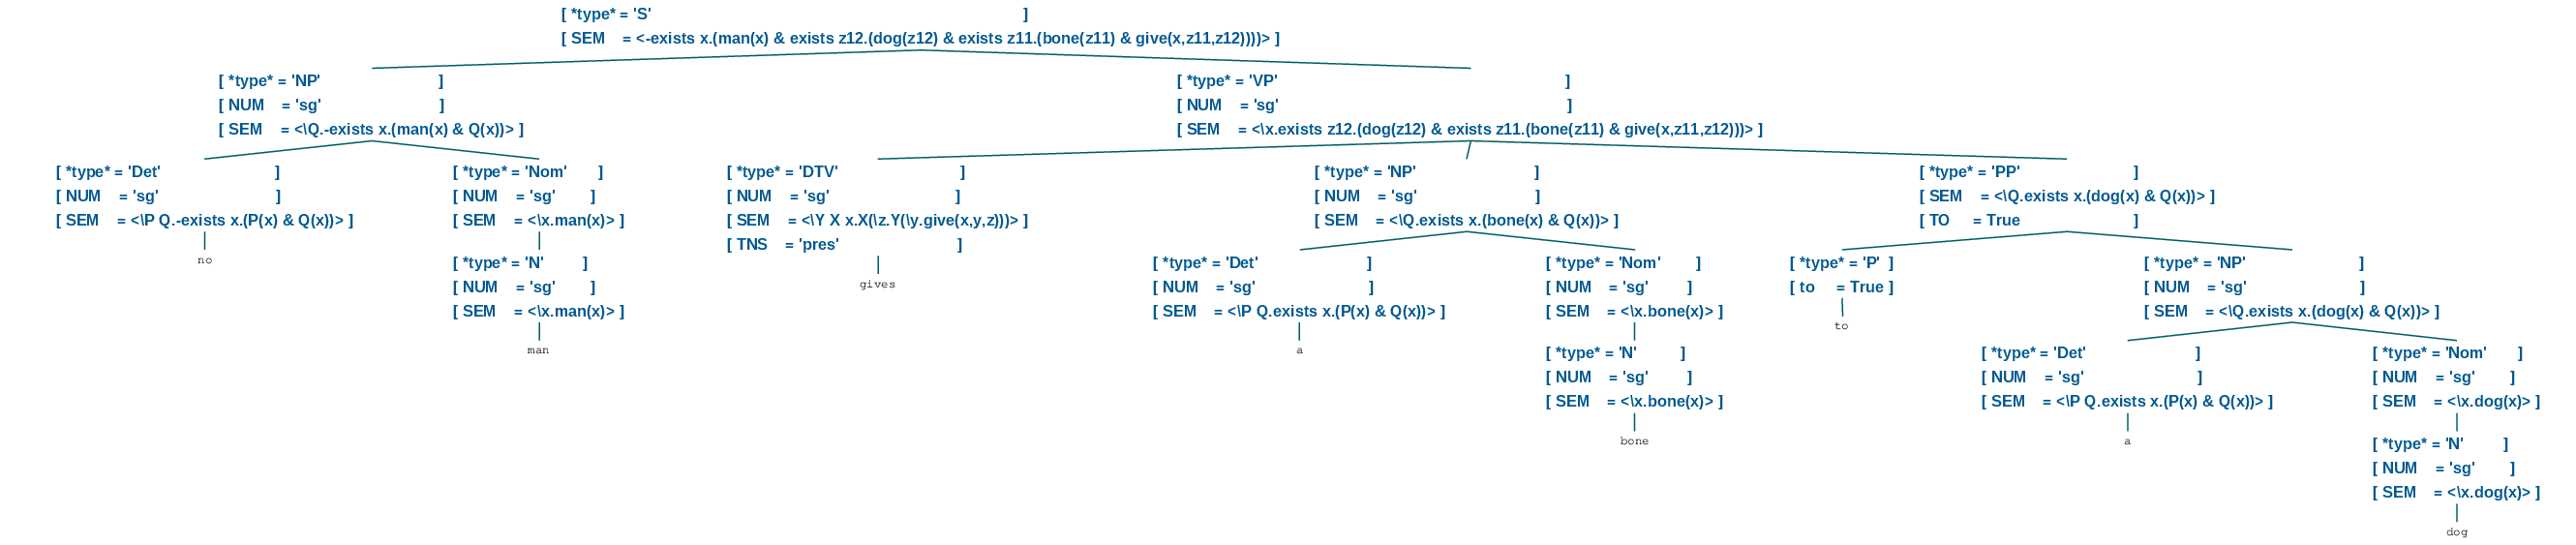

____________________________________________________________________________________________________
no man gives a bone to the dog


$-\exists\ x.(man(x)\ \land\ \exists\ z_{14}.(dog(z_{14})\ \land\ \forall\ y.(dog(y)\ \rightarrow\ (z_{14}\ =\ y))\ \land\ \exists\ z_{13}.(bone(z_{13})\ \land\ give(x,z_{13},z_{14}))))$

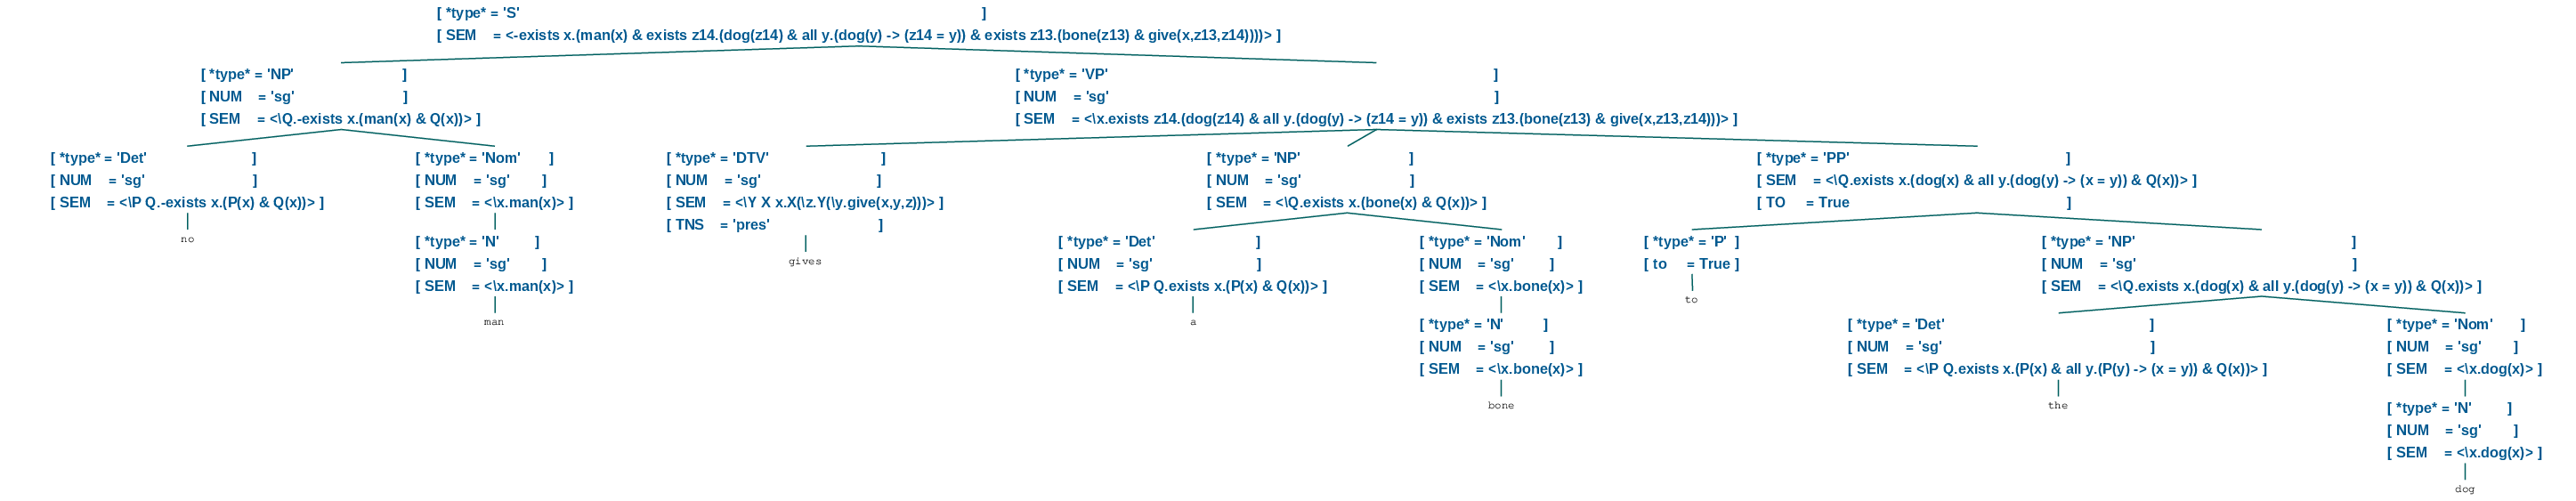

____________________________________________________________________________________________________
a boy and a girl chased every dog


$(\exists\ x.(boy(x)\ \land\ \forall\ z_{15}.(dog(z_{15})\ \rightarrow\ chase(x,z_{15})))\ \land\ \exists\ x.(girl(x)\ \land\ \forall\ z_{15}.(dog(z_{15})\ \rightarrow\ chase(x,z_{15}))))$

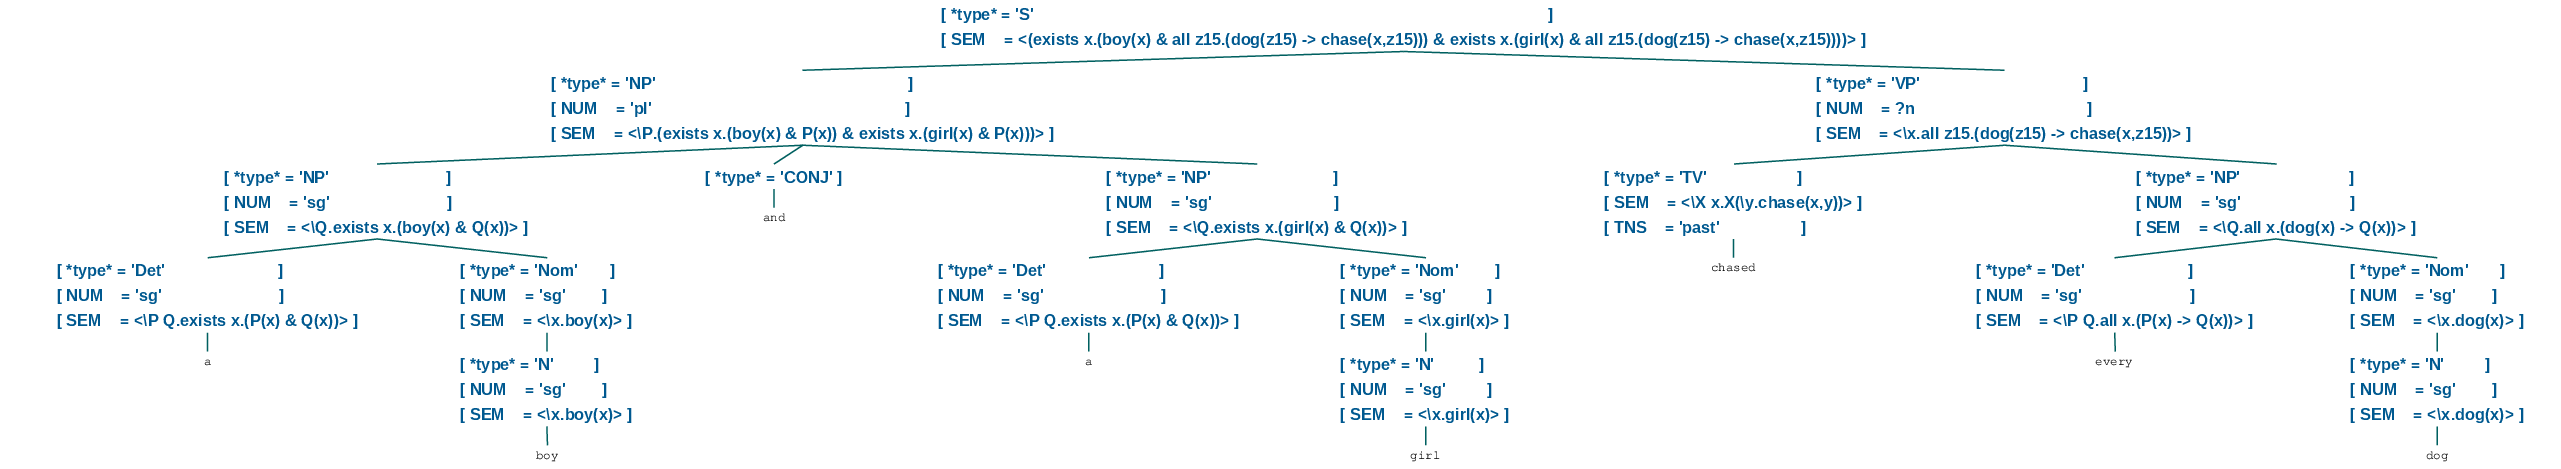

____________________________________________________________________________________________________
every dog chased a boy and a girl


$\forall\ x.(dog(x)\ \rightarrow\ (\exists\ z_{17}.(boy(z_{17})\ \land\ chase(x,z_{17}))\ \land\ \exists\ z_{18}.(girl(z_{18})\ \land\ chase(x,z_{18}))))$

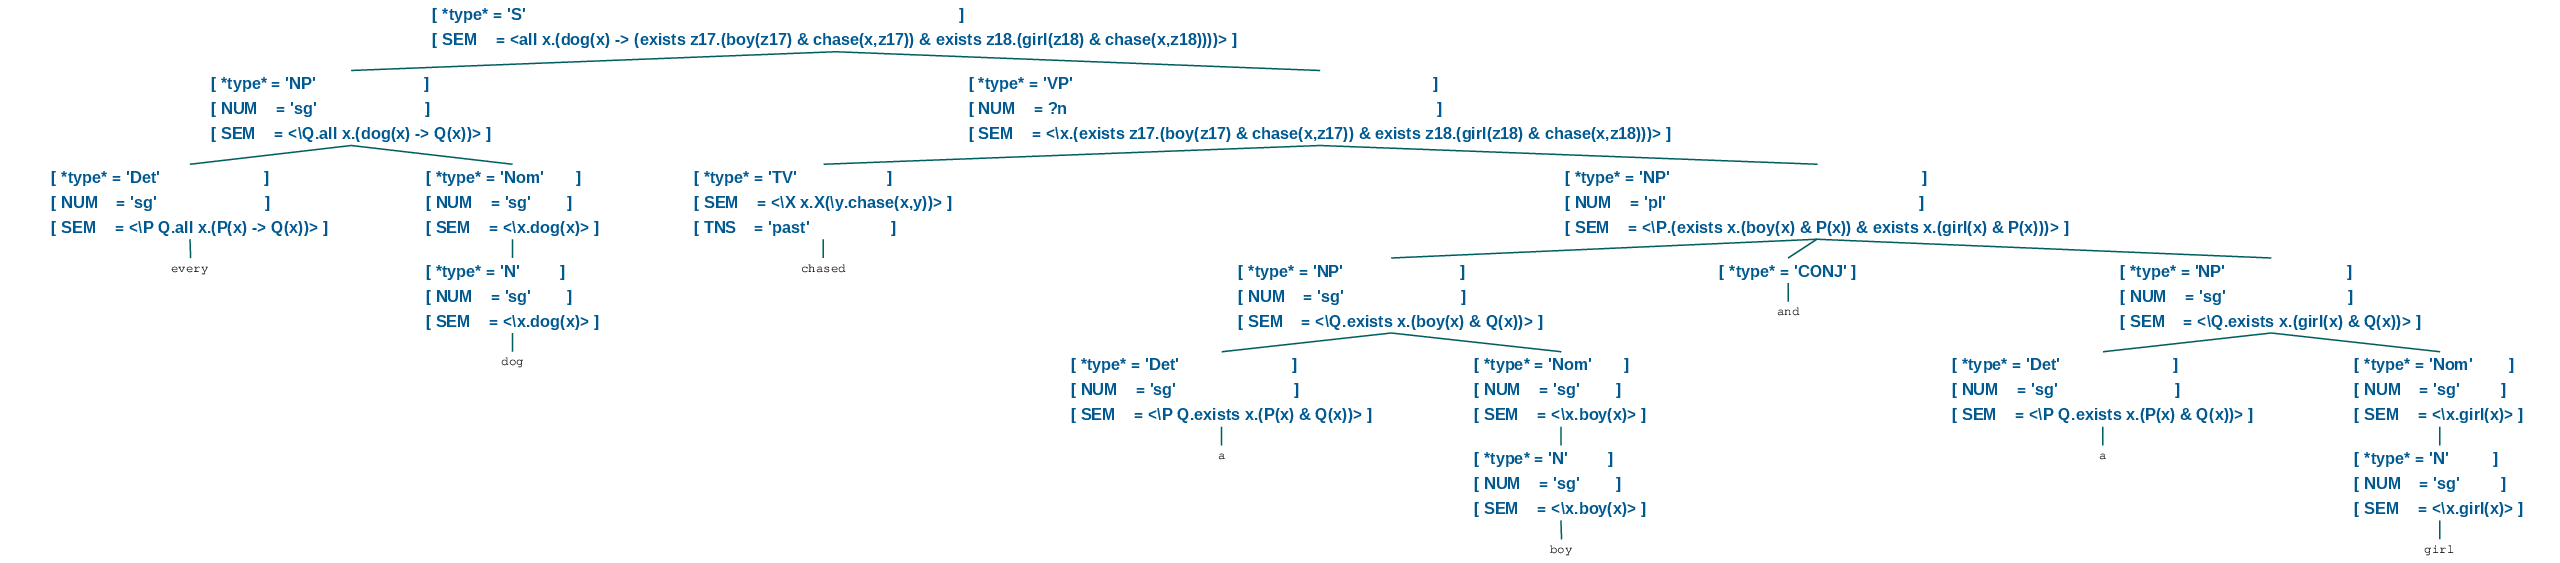

____________________________________________________________________________________________________
a brown cat chases a white dog


$\exists\ x.(brown(x)\ \land\ cat(x)\ \land\ \exists\ z_{19}.(white(z_{19})\ \land\ dog(z_{19})\ \land\ chase(x,z_{19})))$

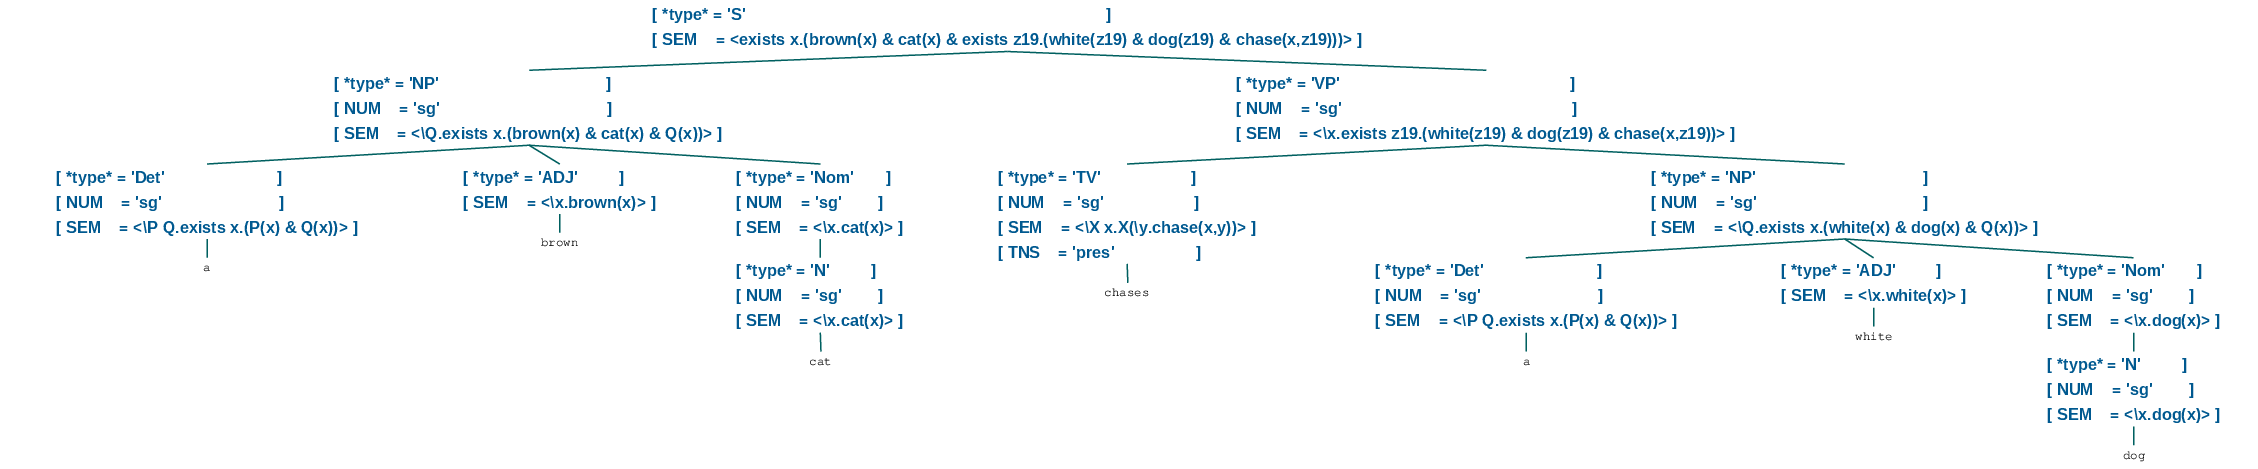

In [12]:
# remove sentences if you couldn't find answer for them
sentences = [
    'no man gives a bone to a dog',
    'no man gives a bone to the dog',
    'a boy and a girl chased every dog',
    'every dog chased a boy and a girl',
    'a brown cat chases a white dog',
]
patata = 0
for results in nltk.interpret_sents(sentences, syntax):
    print('_'*100)
    print(sentences[patata])
    patata += 1
    for (synrep, semrep) in results:
#         display(Markdown('----'))
        display_latex(semrep) # prints the SEM feature of a tree
        display_tree(synrep) # show the parse tree

*Comments:* Two of us think that the formal representation of the two first sentences should be the same, the other two of us think it should be different. We need further clarification.
Should we get rid of Qs and 𝜆s? -> We fixed this problem by

If you are working with iPython which is also running behind Jupyter notebooks and you are changing grammars and want to rerun a new version without restarting you may find `nltk.data.clear_cache()` useful.

## Marks

This part of the assignment has a total of 47 marks.